### Logistic Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer()

In [13]:
import numpy as np
import pandas as pd
df_processed = pd.read_csv("/content/drive/Shareddrives/응머러러/df_merged_new.csv")

import re
def reprocess(text):
    return re.sub(r'[^\s\d\w]','',text).split(' ')
df_processed['title_new'] = df_processed['title_new'].apply(reprocess)

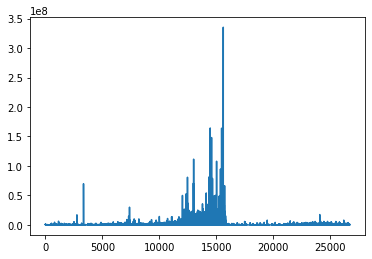

In [14]:
import matplotlib.pyplot as plt
plt.plot(df_processed['views'])
plt.show()

In [15]:
n1 = np.percentile(df_processed['views'].values, 25)
n2 = np.percentile(df_processed['views'].values,50)
n3 = np.percentile(df_processed['views'].values, 75)


In [16]:
p1 = np.percentile(df_processed['publish_time'].values, 25)
p2 = np.percentile(df_processed['publish_time'].values,50)
p3 = np.percentile(df_processed['publish_time'].values, 75)

In [17]:
s1 = np.percentile(df_processed['subs'].values, 25)
s2 = np.percentile(df_processed['subs'].values,50)
s3 = np.percentile(df_processed['subs'].values, 75)


In [18]:
### preprocess views-levels
def ViewPreproc2(data):
    if data <= n1:
        label = 0
    elif n1 < data <= n2:
        label = 1
    elif n2 < data <= n3:
        label = 2
    elif data > n3:
        label = 3
    return label

df_viewlv = []
for view in df_processed['views']:
    label = ViewPreproc2(view)
    df_viewlv.append(label)
df_processed['view_lv'] = df_viewlv

In [19]:
### preprocess time-levels
def ViewPreproc2(data):
    if data <= p1:
        label = 0
    elif p1 < data <= p2:
        label = 1
    elif p2 < data <= p3:
        label = 2
    elif data > p3:
        label = 3
    return label

df_timelv = []
for time in df_processed['publish_time']:
    label = ViewPreproc2(time)
    df_timelv.append(label)
df_processed['time_lv'] = df_timelv

In [20]:
### preprocess subs-levels
def ViewPreproc2(data):
    if data <= s1:
        label = 0
    elif s1 < data <= s2:
        label = 1
    elif s2 < data <= s3:
        label = 2
    elif data > s3:
        label = 3
    return label

df_subslv = []
for subs in df_processed['subs']:
    label = ViewPreproc2(subs)
    df_subslv.append(label)
df_processed['subs_lv'] = df_subslv

In [21]:
X_train

NameError: ignored

In [22]:
df_processed

,label,title_new,emoji,views,subs,channel_name,publish_time,view_lv,time_lv,subs_lv
0,0,"[사람, 번만, 사람, 레전드, 꿀잼, 드라마, 뷰티, 사이드, 보기]",False,804394.0,1960000.0,고몽,202205,3,3,3
1,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,202205,2,3,2
2,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,202205,2,3,2
3,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,202205,1,3,2
4,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,202205,2,3,2
...,...,...,...,...,...,...,...,...,...,...
26737,4,"[아줌마, 브이, 로그, 주부, 일상, 네일아트]",False,93572.0,102000.0,양아치TV AUNT TV,202002,2,0,2
26738,4,"[미국, 유학생, 일상, 브이, 로그, 학교, 브이, 로그, 코딩, 수업, 학교, ...",False,1208.0,522.0,예슬 Serena,202002,0,0,0
26739,4,"[미국, 유학생, 일상, 브이, 로그, 주말, 브이, 로그, 요리, 해먹, 마트, ...",False,950.0,522.0,예슬 Serena,202002,0,0,0
26740,4,[],False,162171.0,1070000.0,Tesla US,202002,2,0,3


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_processed['emoji_label'] = le.fit_transform(df_processed['emoji'])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

### make data to list of strings again
title_filtered = []
for title in df_processed['title_new']:
    title_str =' '.join(title)
    title_filtered.append(title_str) # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환
df_processed['title_str']=title_filtered
display(df_processed)

,label,title_new,emoji,views,subs,channel_name,publish_time,view_lv,time_lv,subs_lv,emoji_label,title_str
0,0,"[사람, 번만, 사람, 레전드, 꿀잼, 드라마, 뷰티, 사이드, 보기]",False,804394.0,1960000.0,고몽,202205,3,3,3,0,사람 번만 사람 레전드 꿀잼 드라마 뷰티 사이드 보기
1,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,202205,2,3,2,1,할인 뷰마 박스 공개
2,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,202205,2,3,2,0,요즘 프로필 메이크업 연예인 프로필 메이크업 역대 메이크업
3,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,202205,1,3,2,0,배우 잠적 이유 뷰티 사이드 요약
4,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,202205,2,3,2,0,청담동 메이크업 추천 그대로 구매 지속 파운데이션 가닥 속눈썹 고급 하이 라이터 웨...
...,...,...,...,...,...,...,...,...,...,...,...,...
26737,4,"[아줌마, 브이, 로그, 주부, 일상, 네일아트]",False,93572.0,102000.0,양아치TV AUNT TV,202002,2,0,2,0,아줌마 브이 로그 주부 일상 네일아트
26738,4,"[미국, 유학생, 일상, 브이, 로그, 학교, 브이, 로그, 코딩, 수업, 학교, ...",False,1208.0,522.0,예슬 Serena,202002,0,0,0,0,미국 유학생 일상 브이 로그 학교 브이 로그 코딩 수업 학교 스킨 케어
26739,4,"[미국, 유학생, 일상, 브이, 로그, 주말, 브이, 로그, 요리, 해먹, 마트, ...",False,950.0,522.0,예슬 Serena,202002,0,0,0,0,미국 유학생 일상 브이 로그 주말 브이 로그 요리 해먹 마트 일상 마스크 마트 중국...
26740,4,[],False,162171.0,1070000.0,Tesla US,202002,2,0,3,0,


In [ ]:
y

### Vectorization ver 1.

In [39]:
tfidf_vectorizer2 = TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features = 1500)
tfidf_features2 = tfidf_vectorizer2.fit_transform(df_processed['title_str'])
tfidf_features2 = np.array(tfidf_features2.todense())
tfidf_features2.shape

(26742, 1500)

In [40]:
tfidf2 = pd.DataFrame(tfidf_features2)
X = pd.concat([tfidf2, df_processed[['subs','emoji_label','publish_time']]], axis = 1)
y = df_processed['view_lv']

In [41]:
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()

X_sc = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [42]:
X_sc

array([[-0.0371612 , -0.03231432, -0.05693603, ...,  0.5748478 ,
        -0.44323418,  1.5757782 ],
       [-0.0371612 , -0.03231432, -0.05693603, ..., -0.2123793 ,
         2.25614372,  1.5757782 ],
       [-0.0371612 , -0.03231432, -0.05693603, ..., -0.30686614,
        -0.44323418,  1.5757782 ],
       ...,
       [-0.0371612 , -0.03231432, -0.05693603, ..., -0.38445207,
        -0.44323418, -1.19728539],
       [-0.0371612 , -0.03231432, -0.05693603, ...,  0.13913131,
        -0.44323418, -1.19728539],
       [-0.0371612 , -0.03231432, -0.05693603, ..., -0.38445207,
        -0.44323418, -1.19728539]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=y)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_rnd)

0.7517757009345795

딥러닝,,, 근데 이렇게 하는게 맞나..

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [46]:
yed = pd.get_dummies(df_processed['view_lv'])

In [47]:
Xed_train, Xed_test, yed_train, yed_test = train_test_split(X_sc, yed, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=yed)

In [48]:
Xed_train.shape

(24067, 1503)

In [49]:
model = Sequential()
model.add(Dense(64, input_dim=1503, activation='softmax'))
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(Xed_train, yed_train, epochs=100)

In [ ]:
model.evaluate(Xed_test, yed_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, accuracy_score
mse = mean_absolute_error(y_test, y_pred)
print(mse)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))